In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import dataset dengan pandas
data = pd.read_csv('/content/drive/MyDrive/kerjaa /data analyst/Mobile Price Range/train (1).csv')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [4]:
# Predict data using random forest classification algorithm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into features (X) and target (y)
X = data.drop('price_range', axis=1)
y = data['price_range']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8925


In [5]:
#test with another data
data_test = pd.read_csv('/content/drive/MyDrive/kerjaa /data analyst/Mobile Price Range/test (1).csv')

In [6]:
data_test = data_test.drop('id', axis=1)

In [7]:
# Make predictions on the test set
y_pred_test = rf_classifier.predict(data_test)

y_pred_test

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 1, 2, 1, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 3, 1, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

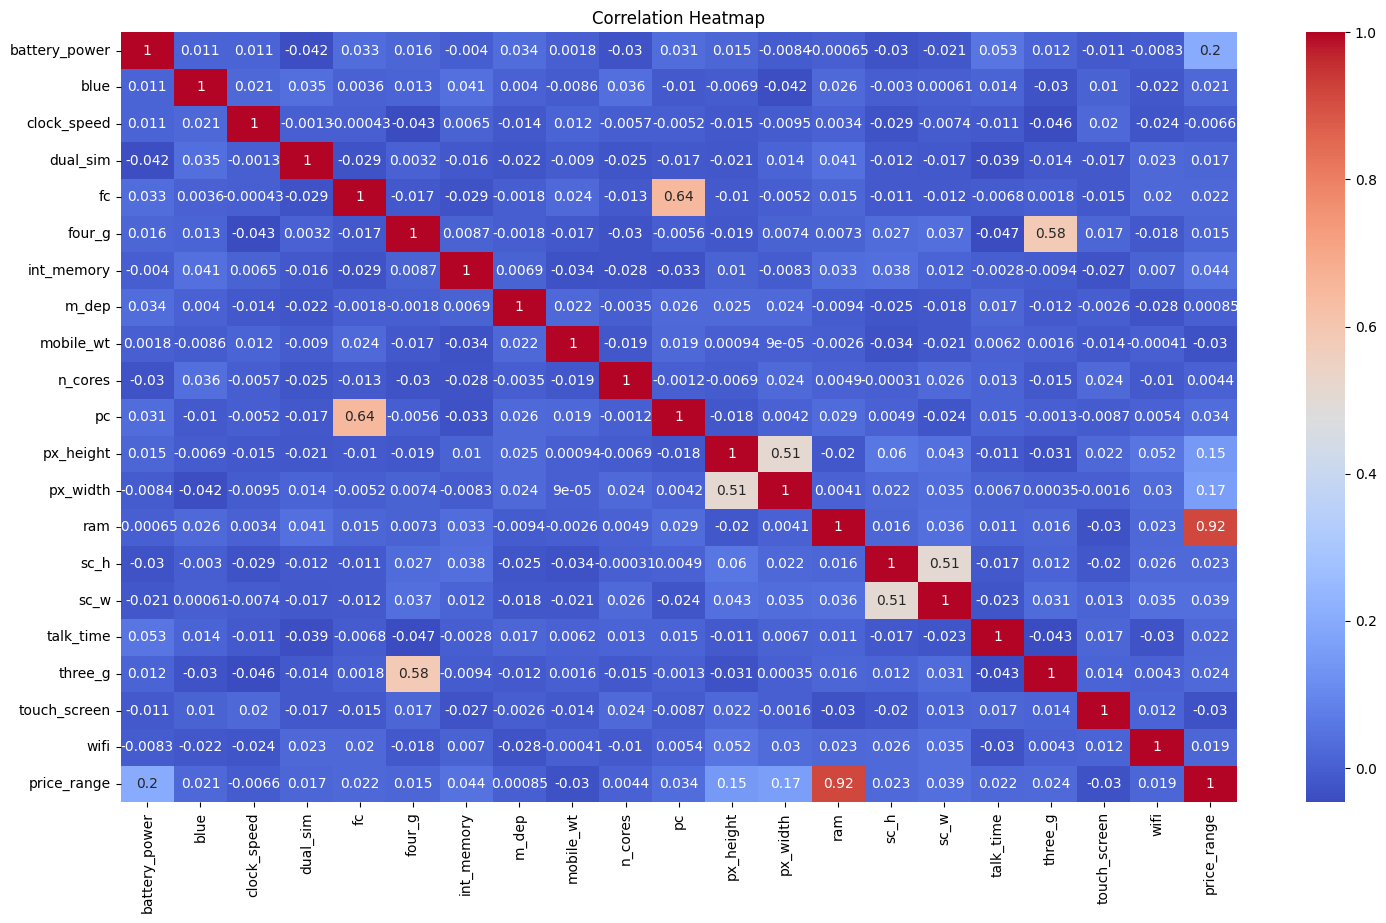

In [16]:
# Correlation heatmap
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Correlation matrix
correlation_matrix = data.corr()

# Extract correlations with 'price_range'
price_correlations = correlation_matrix['price_range'].sort_values(ascending=False)

print(price_correlations)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


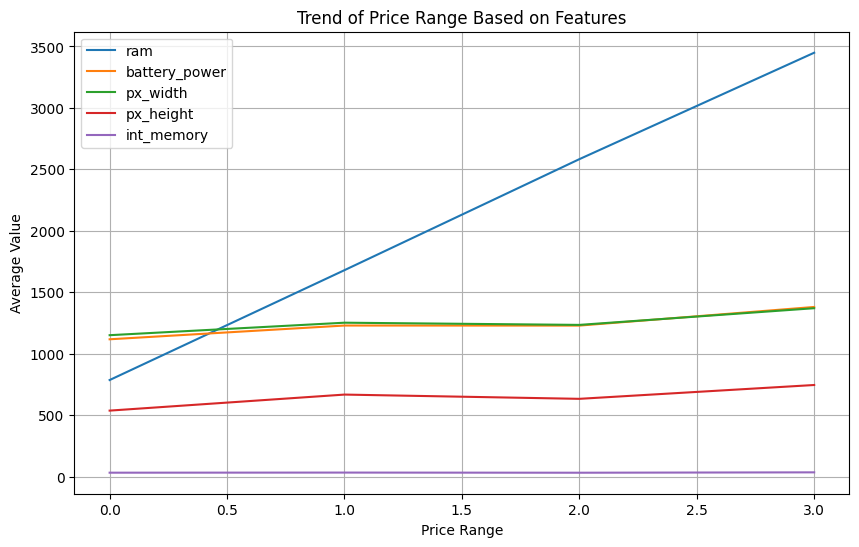

In [27]:
# Trend price_range based on ram, battery power, px_width, px_height, int_memory
trend_data = data.groupby('price_range')[['ram', 'battery_power', 'px_width', 'px_height', 'int_memory']].mean()

# Plot trends
trend_data.plot(kind='line', figsize=(10, 6))
plt.title('Trend of Price Range Based on Features')
plt.xlabel('Price Range')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()


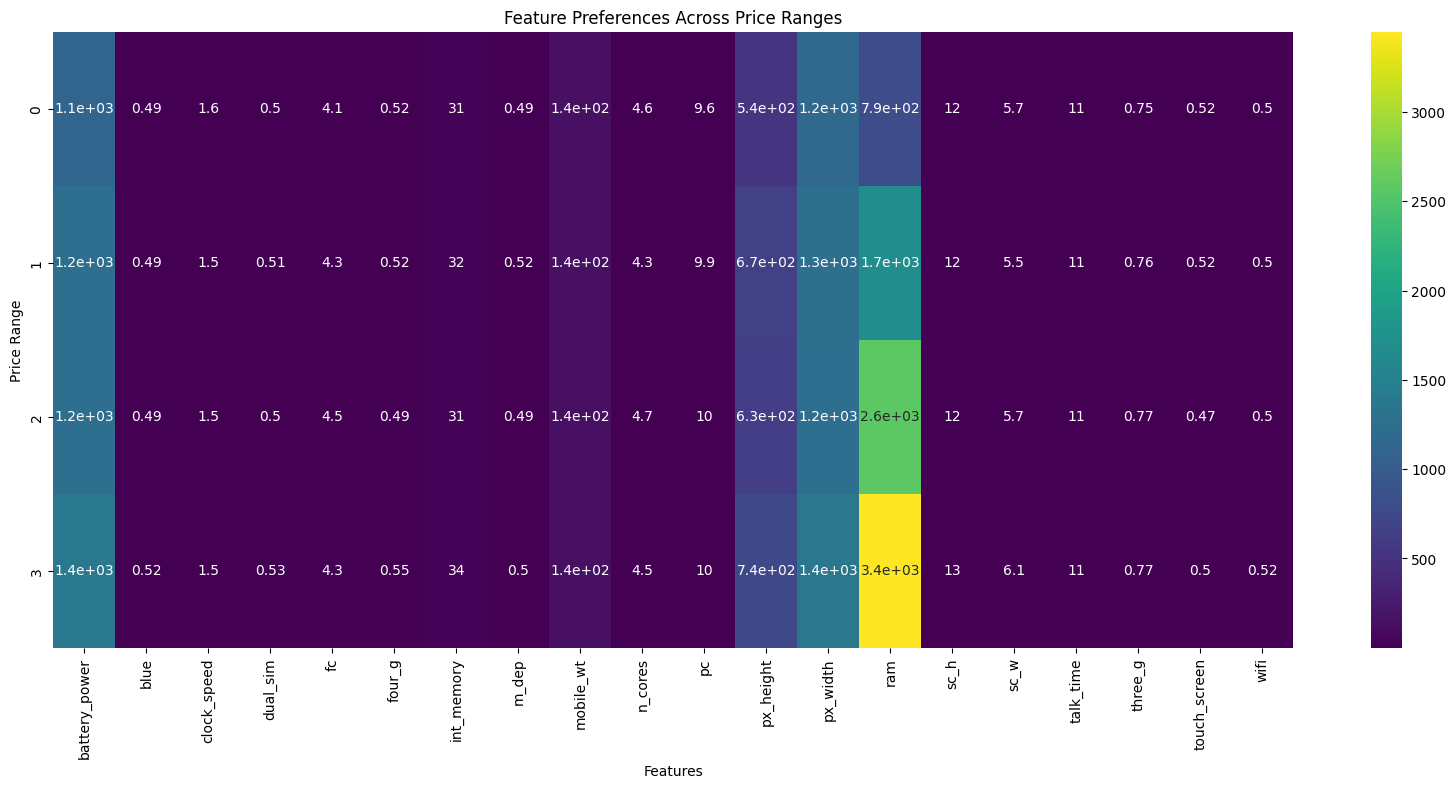


**Price Range: 1**
ram              1679.490
px_width         1251.908
battery_power    1228.868
px_height         666.892
mobile_wt         140.510
Name: 1, dtype: float64

**Price Range: 2**
ram              2582.816
px_width         1234.046
battery_power    1228.320
px_height         632.284
mobile_wt         143.614
Name: 2, dtype: float64

**Price Range: 3**
ram              3449.232
battery_power    1379.984
px_width         1369.838
px_height         744.848
mobile_wt         136.320
Name: 3, dtype: float64

**Price Range: 0**
px_width         1150.270
battery_power    1116.902
ram               785.314
px_height         536.408
mobile_wt         140.552
Name: 0, dtype: float64


In [24]:
# Understanding customer preferences for different features and price points

# Group data by price range and calculate mean values for all features
feature_preferences = data.groupby('price_range').mean()

# Plot heatmap for feature preferences
plt.figure(figsize=(20, 8))
sns.heatmap(feature_preferences, annot=True, cmap='viridis')
plt.title('Feature Preferences Across Price Ranges')
plt.xlabel('Features')
plt.ylabel('Price Range')
plt.show()

# Analyze specific feature preferences within price ranges
for price_range in data['price_range'].unique():
  print(f"\n**Price Range: {price_range}**")
  top_features = feature_preferences.loc[price_range].sort_values(ascending=False).head(5)
  print(top_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

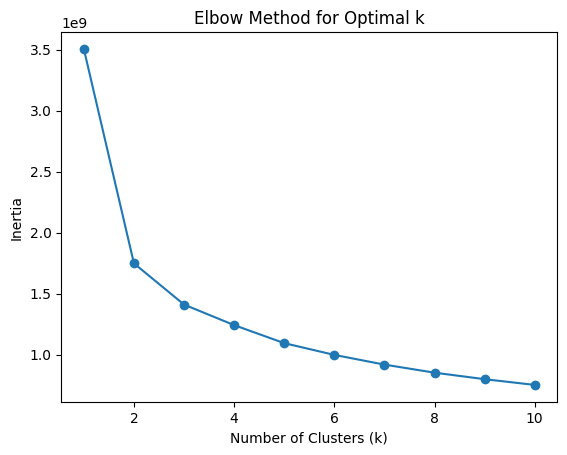

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
# Segmenting the market to target specific customer groups with phones that cater to their needs and budget

# **1. K-Means Clustering**
segmentation_features = data[['ram', 'battery_power', 'px_width', 'px_height', 'int_memory', 'price_range']]

# Determine optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(segmentation_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with chosen number of clusters
optimal_k = 3  # Based on Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['segment'] = kmeans.fit_predict(segmentation_features)

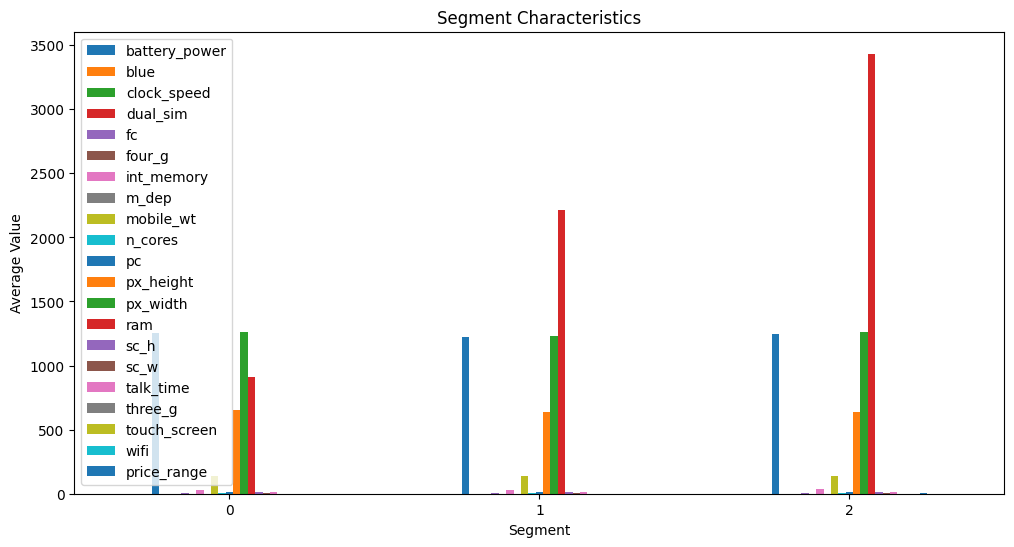

In [36]:
# **2. Analyze Segment Characteristics**
# Group data by segment and analyze feature distributions
segment_analysis = data.groupby('segment').mean()

# Visualize segment characteristics
segment_analysis.plot(kind='bar', figsize=(12, 6))
plt.title('Segment Characteristics')
plt.xlabel('Segment')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()

In [39]:
# **3. Target Specific Customer Groups**

# Example: Target segment 0 with budget-friendly phones with good battery life
segment_0_phones = data[data['segment'] == 0]
print(segment_0_phones[['battery_power', 'price_range']].describe())

# Example: Target segment 1 with high and wide screen for immersive viewing experiences
segment_1_phones = data[data['segment'] == 1]
print(segment_1_phones[['px_width', 'px_height', 'price_range']].describe())

# Example: Target segment 2 with high-performance phones with large RAM and storage
segment_2_phones = data[data['segment'] == 2]
print(segment_2_phones[['ram', 'int_memory', 'price_range']].describe())


       battery_power  price_range
count     707.000000   707.000000
mean     1250.209335     0.330976
std       434.184669     0.508499
min       503.000000     0.000000
25%       877.000000     0.000000
50%      1239.000000     0.000000
75%      1621.500000     1.000000
max      1996.000000     2.000000
          px_width    px_height  price_range
count   683.000000   683.000000   683.000000
mean   1232.187408   640.130307     1.591508
std     422.610294   429.406966     0.635036
min     500.000000     0.000000     0.000000
25%     870.500000   288.000000     1.000000
50%    1217.000000   560.000000     2.000000
75%    1591.000000   937.000000     2.000000
max    1998.000000  1960.000000     3.000000
               ram  int_memory  price_range
count   610.000000  610.000000   610.000000
mean   3433.268852   32.973770     2.752459
std     336.309401   18.355797     0.431938
min    2819.000000    2.000000     2.000000
25%    3143.250000   16.000000     3.000000
50%    3444.500000   34.0